# Pymaceuticals Inc.
---

### Analysis

- Out of all drug regimens, the mean and median were within the closest range with the following treatments: Ramicane, Capomulin, Ceftamin, and Infubinol. The most negligible variance was also the case for the same drugs.    -The number of mice tested per treatment type was spread proportionally, approximately 200 per drug regimen. However, Capomulin and Ramicane were tested on a higher number of mice. The sex distribution was respected; half of the mice were females, and the other half were males.                                                              -The tumour volume results after treatment were comparatively lower with two drugs: Ramicane and Capomuine. The other two drugs showed a more considerable volume of the tumor. Additionally, there were outliers with Infubinol, which could be either a mistake or unpredictable factors that can be explored.                                      -The Ramicane tumour volume distribution shows that the upper quartile is smaller than the lower quartile. I assume that most of the data values are concentrated toward the right-hand side of the distribution.                      -Capomulin treatment is normally distributed, and the best option out of all drugs.                                -The linear regression output values tell us that there is a strong positive relationship between weight and average tumour size, and that weight is a significant predictor of average tumor size. The p-value is 1.3226e-07, which is very small (0.00000013225722434712404). This indicates that we can reject the null hypothesis and conclude that there is a significant relationship between weight and average tumour size.

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
import numpy as np

In [273]:
mouse_metadata=pd.read_csv("module_5_starter_code/Pymaceuticals/data/Mouse_metadata.csv")
mouse_metadata.sample(5)

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
136     l661     Ceftamin    Male          18          26
151     n678     Propriva    Male           5          29
247     z795     Naftisol  Female          13          29
187     s152      Placebo  Female           4          30
14      m957    Capomulin  Female           3          19
104     g558     Propriva    Male           8          29
17      a644     Ramicane  Female           7          17
13      r554    Capomulin  Female           8          17
44      a444     Ramicane  Female          10          25
158     o523     Propriva  Female           6          25

In [274]:
study_results=pd.read_csv("module_5_starter_code/Pymaceuticals/data/Study_results.csv")
study_results.sample(10)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
969      a897         20           54.595705                 3
774      v719         15           52.609108                 1
1866     o795         45           73.059454                 4
240      y793          0           45.000000                 0
110      v719          0           45.000000                 0
125      b313          0           45.000000                 0
1148     t724         25           59.826068                 1
1492     z581         35           58.628399                 3
1848     c559         45           61.840058                 4
1710     g558         40           61.774963                 4

In [275]:
combined_df=pd.merge(mouse_metadata,study_results,on="Mouse ID", how="outer")
# Checking the number of mice.
id_dataframe=combined_df["Mouse ID"].unique()
print(len(id_dataframe))

249


In [276]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate=combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicate)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [277]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_mouth = combined_df.loc[combined_df["Mouse ID"] == "g989"]
g989_mouth 

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [278]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.loc[combined_df["Mouse ID"] != "g989"]
cleaned_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [279]:
id=cleaned_df["Mouse ID"].nunique()
id



248

# *Summary Statistics*

In [280]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_volume=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_tumor_volume=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_tumor_volume=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sterror_tumor_volume=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


summary_drugs={
    "Mean Tumor Volume":mean_tumor_volume,
    "Median Tumor Volume":median_tumor_volume,
    "Tumor Volume Variance":variance_tumor_volume,
    "Tumor Volume Std. Dev.":std_tumor_volume,
    "Tumor Volume Std. Err.":sterror_tumor_volume
}



summary_drugs = pd.DataFrame(summary_drugs)
summary_drugs.index.name = "Drug Regimen"

# Display results
summary_drugs

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [298]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_drug_al = cleaned_df.groupby(["Drug Regimen"]).aggregate({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
summary_drug_al 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [305]:
summary_drug_al["Mean- Median"] = summary_drug_al[("Tumor Volume (mm3)", "mean")] - summary_drug_al[("Tumor Volume (mm3)", "median")]
summary_drug_al = summary_drug_al.sort_values(by=[("Tumor Volume (mm3)", "var")], ascending=True)
summary_drug_al 

Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   

             Mean- Median  
                           
Drug Regimen               
Ramicane        -0.456490  
Capomulin       -0.882068  
Ceftamin         0.815015  
Infubinol        1.064211  
Propriva         1.874664  
Zoniferol        1.418027  
Stelasyn         1.801412  
Placebo          1.744647  
Naftisol         1.822280  
Ketapril         1.536895

## *Bar and Pie Charts*


<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

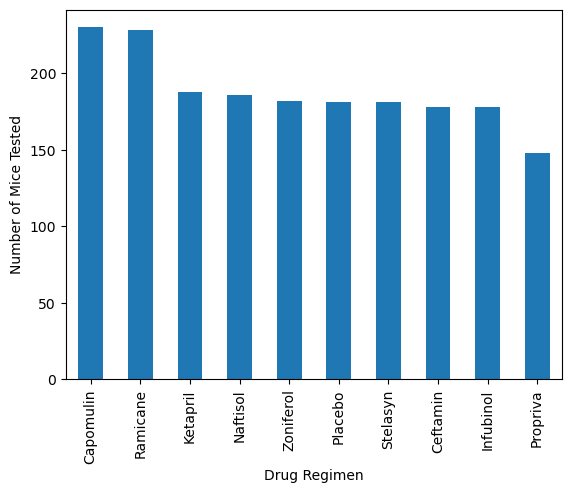

In [282]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen = cleaned_df.groupby("Drug Regimen").count()
drug_regimen_sorted = drug_regimen.sort_values(by="Timepoint", ascending=False)
drug_regimen_sorted.plot(kind="bar", y="Timepoint", ylabel="Number of Mice Tested", legend= False)



Text(0.5, 0, 'Drug Regimen')

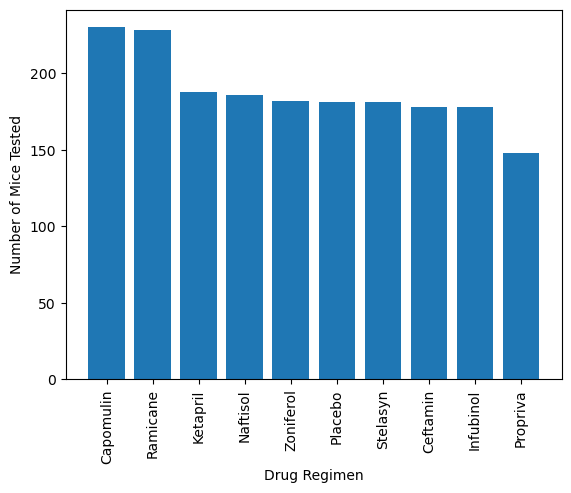

In [310]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#drug_regimen_sorted.plot(kind="bar", y="Timepoint", ylabel="Number of Mice Tested", legend= False)

drug_regimen = cleaned_df.groupby("Drug Regimen").count()
timepoint = drug_regimen.sort_values(by="Timepoint", ascending=False)["Timepoint"]
x_axis = np.arange(len(timepoint))
tick_locations = [value for value in x_axis]
drugs = timepoint.index.tolist()

plt.bar(x_axis, timepoint)
plt.xticks(tick_locations, drugs,rotation=90)
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")


<AxesSubplot:ylabel='Sex'>

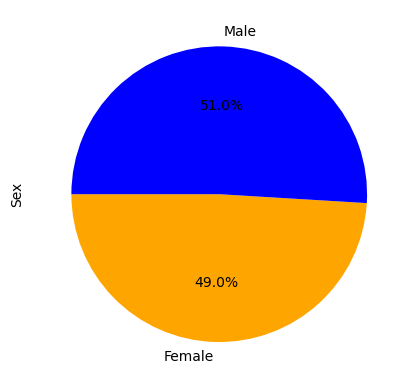

In [284]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = cleaned_df.groupby("Sex").count()
mouse_sex
mouse_sex.plot(kind="pie", y="Mouse ID", legend=False, autopct="%1.1f%%",ylabel="Sex", startangle=180, colors=["orange","blue"])

Text(0, 0.5, 'Sex')

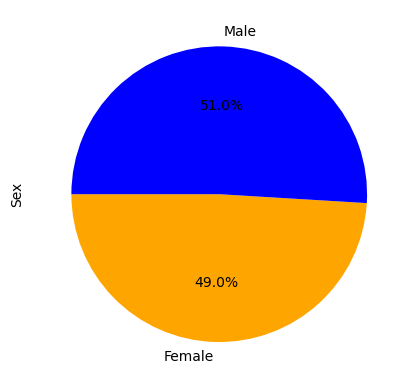

In [285]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = cleaned_df.groupby("Sex").count()
values = mouse_sex["Mouse ID"]
colors = ["orange", "blue"]
plt.pie(values, labels=values.index, colors=colors, autopct="%1.1f%%", startangle=180)
plt.ylabel("Sex")

# *Quartiles, Outliers and Boxplots*

In [286]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = cleaned_df.loc[(cleaned_df["Drug Regimen"]=="Capomulin") | (cleaned_df["Drug Regimen"]=="Ramicane") | (cleaned_df["Drug Regimen"]=="Infubinol") | (cleaned_df["Drug Regimen"]=="Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = final_tumor_volume.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(cleaned_df,on=['Mouse ID','Timepoint'],how="left")


In [287]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

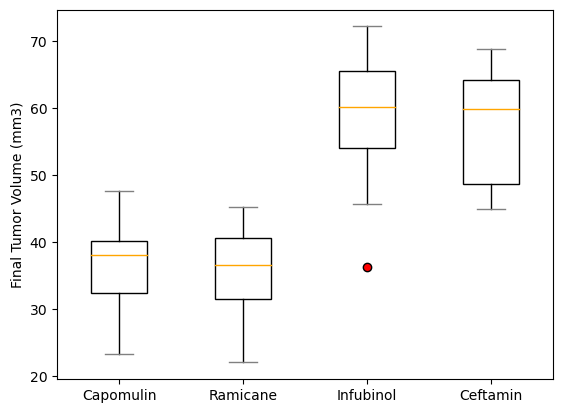

In [288]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_list, labels=treatment_list, showfliers=True, notch=False, patch_artist=True, boxprops=dict(facecolor="white"), whiskerprops=dict(color='Black'), medianprops=dict(color='Orange'), capprops=dict(color='Gray'),flierprops=dict(markerfacecolor='red'))
# set the title and axis labels
plt.ylabel('Final Tumor Volume (mm3)')

# *Line and Scatter Plots*

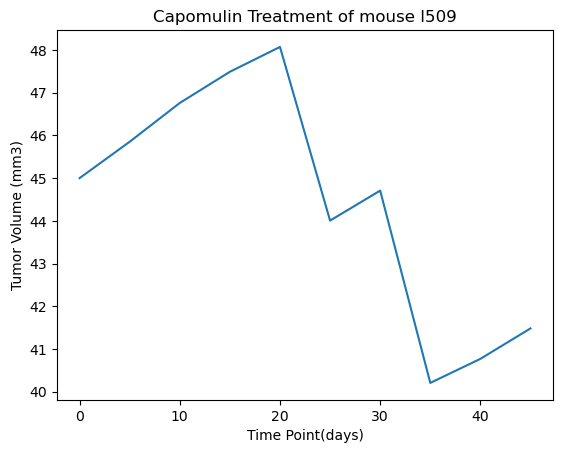

In [289]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mousel509 = cleaned_df.loc[(cleaned_df["Mouse ID"]=="l509"), ['Tumor Volume (mm3)', 'Timepoint']]
mousel509

plt.plot(mousel509["Timepoint"],mousel509["Tumor Volume (mm3)"])
plt.title('Capomulin Treatment of mouse l509')
plt.xlabel('Time Point(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()



/var/folders/xq/xdbqztz92zs24q39hvzwj65m0000gn/T/ipykernel_58490/1080439115.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_tumor = Capomulin_tumor_volume.groupby(["Mouse ID"])['Tumor Volume (mm3)','Weight (g)'].mean()


<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

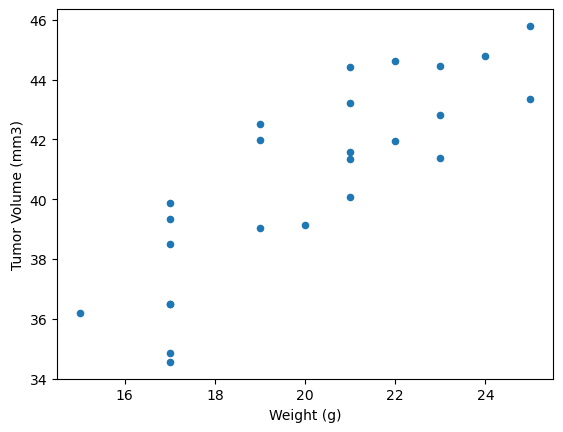

In [290]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_tumor_volume = cleaned_df.loc[(cleaned_df["Drug Regimen"]=="Capomulin")]
mean_tumor = Capomulin_tumor_volume.groupby(["Mouse ID"])['Tumor Volume (mm3)','Weight (g)'].mean()
mean_tumor

mean_tumor.plot.scatter(x='Weight (g)', y="Tumor Volume (mm3)")


# *Correlation and Regression*

0.9544396890241048
21.552160532685008
0.8419363424694721
1.3225722434712404e-07
0.12754359033201323


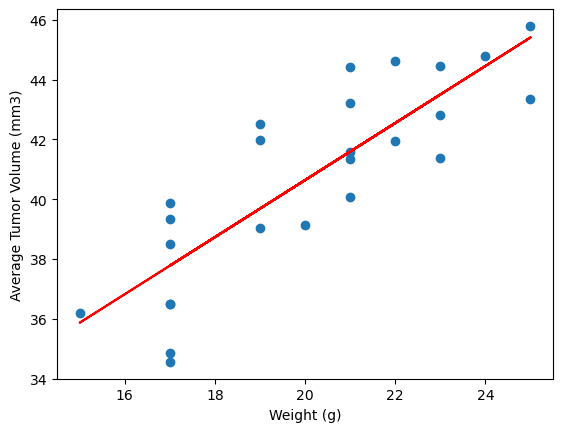

In [311]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate linear regression line
slope, intercept, rvalue, pvalue, stderr = stats.linregress(mean_tumor['Weight (g)'],mean_tumor['Tumor Volume (mm3)'])
fit = slope * weight_capomulin + intercept

# Create scatter plot and add linear regression line
plt.scatter(mean_tumor['Weight (g)'],mean_tumor['Tumor Volume (mm3)'],)
plt.plot(weight_capomulin, fit, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
